# Plots and visualizations

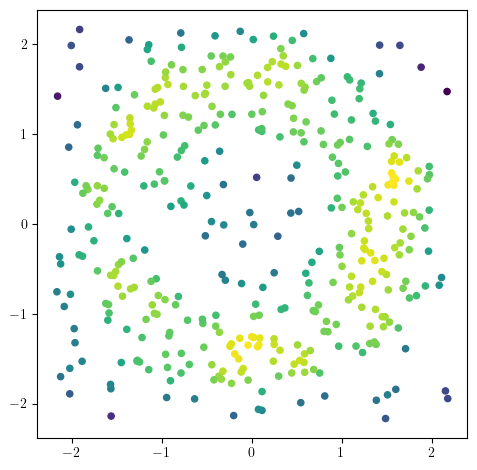

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multipers as mp
from multipers.data import noisy_annulus
from multipers.filtrations.density import KDE
np.random.seed(1)
X = noisy_annulus(n1=200, n2=200) 
codensity = - (KDE(bandwidth=0.2, return_log=True).fit(X).score_samples(X))
plt.scatter(X[:,0], X[:,1], s=20, c=-codensity);
plt.gca().set_aspect(1);

## Rips complex

In [2]:
from multipers.filtrations import RipsLowerstar
st = RipsLowerstar(points=X, function=codensity).collapse_edges(-2).expansion(2)

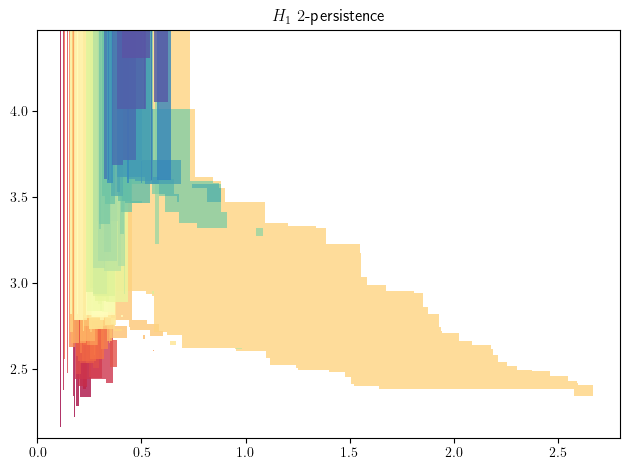

In [3]:
mma = mp.module_approximation(st)
mma.plot(degree = 1)

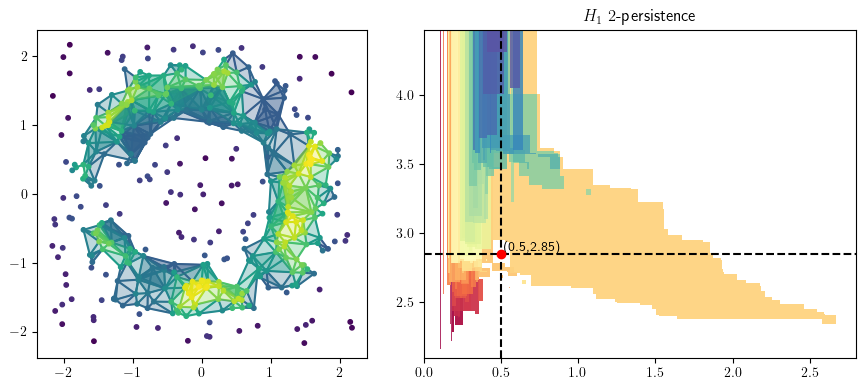

In [4]:
from multipers.plots import plot_simplicial_complex
radius = .5
codens = 2.85
plot_simplicial_complex(st,X, radius, codens, mma=mma, degree=1)
plt.gcf().set_size_inches(9, 4)

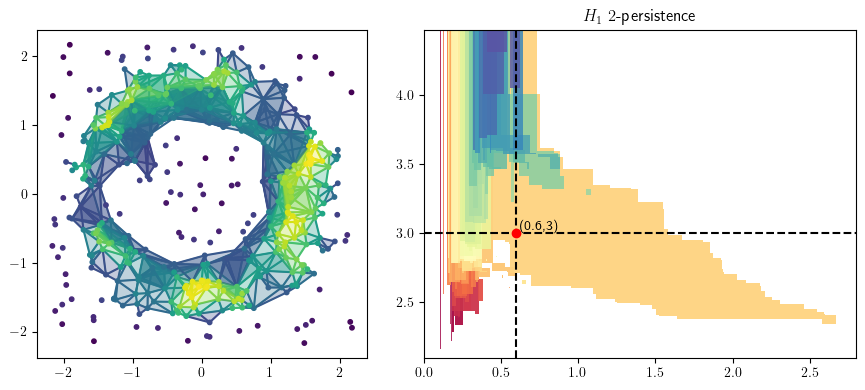

In [5]:
from multipers.plots import plot_simplicial_complex
radius = .6
codens = 3
plot_simplicial_complex(st,X, radius, codens, mma=mma, degree=1)
plt.gcf().set_size_inches(9, 4)

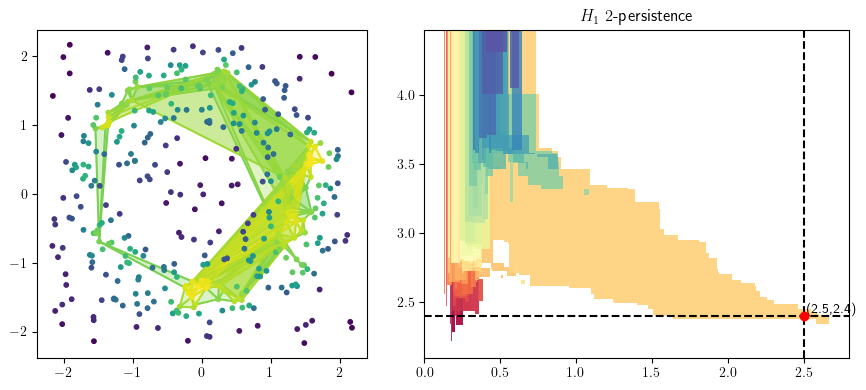

In [6]:
from multipers.plots import plot_simplicial_complex
radius = 2.5
codens = 2.4
plot_simplicial_complex(st,X, radius, codens, mma=mma, degree=1)
plt.gcf().set_size_inches(9, 4)

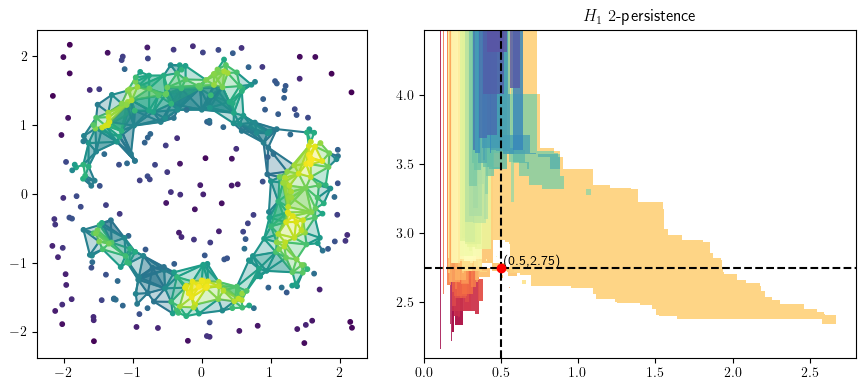

In [7]:
from multipers.plots import plot_simplicial_complex
radius = .5
codens = 2.75
plot_simplicial_complex(st,X, radius, codens, mma=mma, degree=1)
plt.gcf().set_size_inches(9, 4)

## Delaunay-Lowerstar

In [8]:
from multipers.filtrations import DelaunayLowerstar
st_delaunay = DelaunayLowerstar(points = X, function=codensity)
mma = mp.module_approximation(st_delaunay)

/tmp/ipykernel_161184/617221178.py:3: UserWarning: (copy warning) Got a non-vine slicer as an input. Use `vineyard=True` to remove this copy.
  mma = mp.module_approximation(st_delaunay)


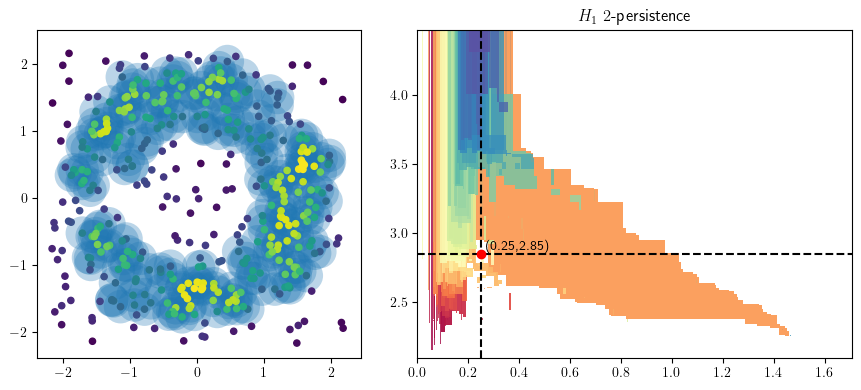

In [9]:
from multipers.plots import plot_point_cloud
radius = .25
codens = 2.85
plot_point_cloud(X, codensity,radius,codens, mma=mma,degree=1)
plt.gcf().set_size_inches(9, 4)

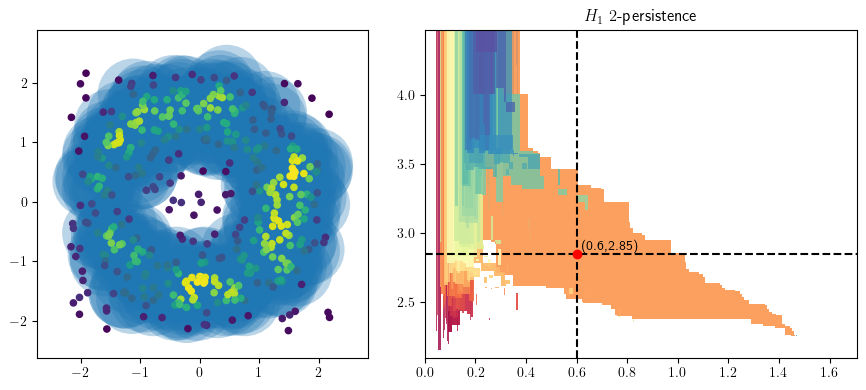

In [10]:
from multipers.plots import plot_point_cloud
radius = .6
codens = 2.85
plot_point_cloud(X, codensity,radius,codens, mma=mma,degree=1)
plt.gcf().set_size_inches(9, 4)

## Signed measures

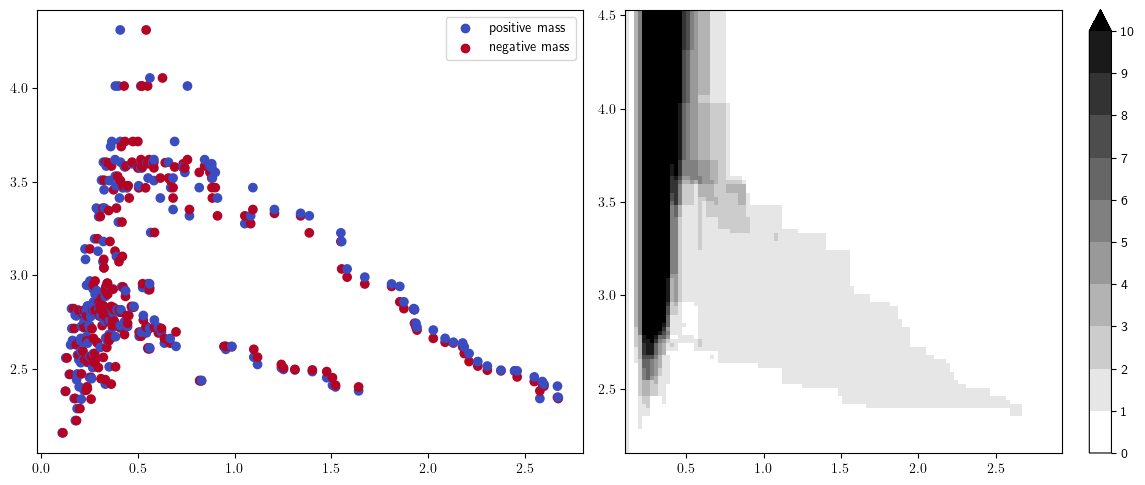

In [11]:
fig, (a,b) = plt.subplots(ncols=2, figsize=(12,5))
plt.sca(a)
sm, = mp.signed_measure(st, degree=1, plot=True, invariant="hilbert");
plt.sca(b)
mp.point_measure.integrate_measure(*sm, plot=True);

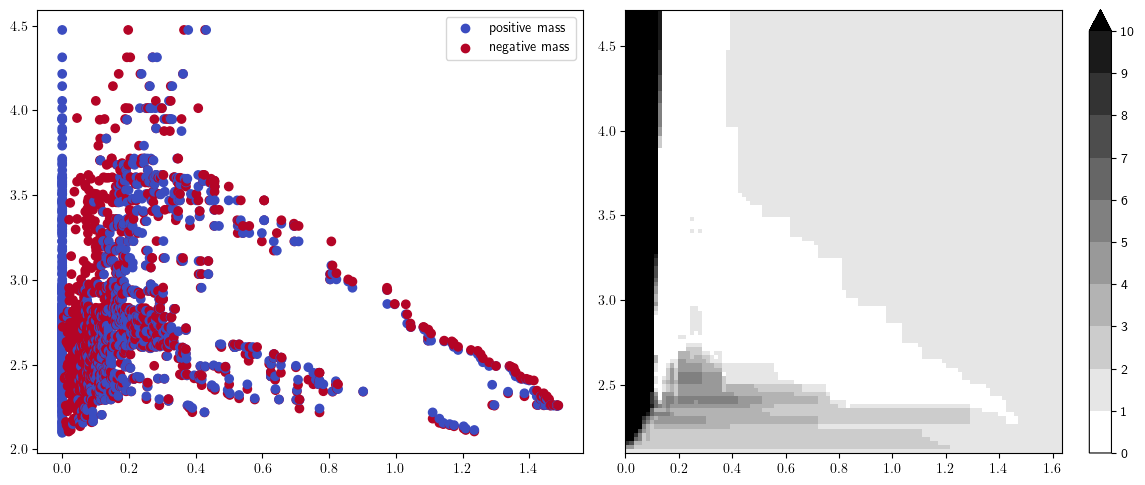

In [12]:
fig, (a,b) = plt.subplots(ncols=2, figsize=(12,5))
plt.sca(a)
(pts,w), = mp.signed_measure(st_delaunay,  plot=True, invariant="euler");
plt.sca(b)
mp.point_measure.integrate_measure(pts, w, plot=True); # only the positive part here

## Line slices

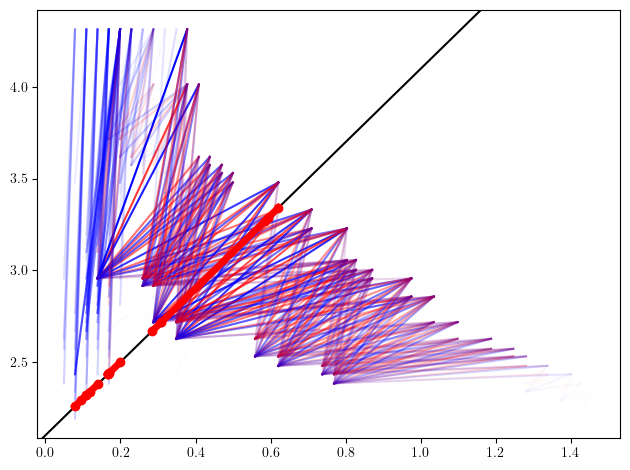

In [13]:
s = mp.Slicer(st_delaunay).minpres(1)
sm, = mp.signed_measure(
    s.grid_squeeze(strategy="regular_closest", resolution=50),
    plot=True,
    degree=1,
    invariant="rectangle"
);

basepoint= np.asarray([1,4.1])
direction= np.array([.5,1.])
bc = mp.point_measure.barcode_from_rank_sm(sm=sm, basepoint=basepoint, direction=direction)
slope=direction[1]/direction[0]
plt.axline(basepoint,slope=slope,c="k")
for bar in bc:
    bar = basepoint[None] + direction[None]*bar[:,None]
    plt.plot(bar[:,0], bar[:,1], 'ro-', lw=5)

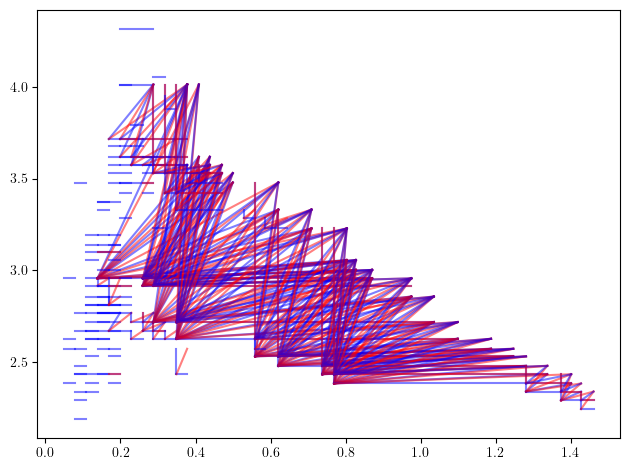

In [14]:
sm_hook, = mp.signed_measure(
    s.grid_squeeze(strategy="regular_closest", resolution=50),
    degree=1,
    invariant="hook",
)
mp.plots.plot_signed_measure(sm_hook, alpha=.5)

In [15]:
from gudhi.wasserstein import wasserstein_distance
bc_ground_truth = s.persistence_on_line(basepoint=basepoint, direction=direction)[1]
print("Bottleneck error:",wasserstein_distance(bc,bc_ground_truth)) # the `grid_squeeze` introduced an error 

Bottleneck error: 0.11974205620221179


/tmp/ipykernel_161184/3922999236.py:1: UserWarning: (copy warning) Got a non-vine slicer as an input. Use `vineyard=True` to remove this copy.
  mma_delaunay = mp.module_approximation(s)


Bottleneck error: 0.0007861610342647651


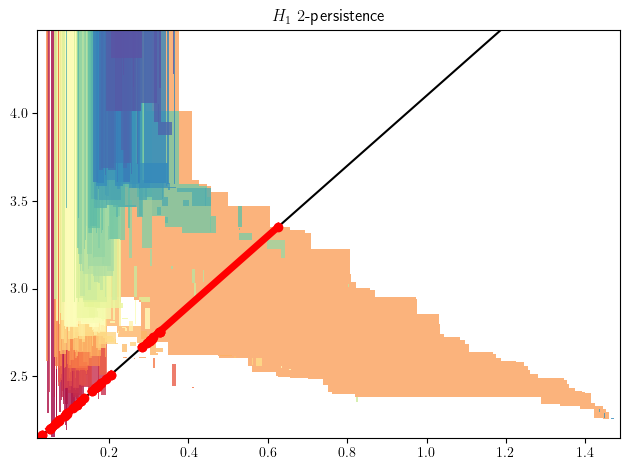

In [16]:
mma_delaunay = mp.module_approximation(s)
mma_delaunay.plot(1)
bc2 = mma_delaunay.barcode2(basepoint=basepoint, direction=direction, keep_inf=False)[1]
slope=direction[1]/direction[0]
plt.axline(basepoint,slope=slope,c="k")
for bar in bc2:
    bar = basepoint[None] + direction[None]*bar[:,None]
    plt.plot(bar[:,0], bar[:,1], 'ro-', lw=5)
    
print("Bottleneck error:", wasserstein_distance(bc2, bc_ground_truth))